<img height="42" src="../logos.png" width="320"/>

**Avaliação com Utilizadores** -- Propostas de Solução

# Tarefa 6

Dado o ECG anterior já pré-processado:

In [1]:
from ltbio.biosignals import Biosignal
from datetime import timedelta
from ltbio.processing.formaters import Segmenter
ecg = Biosignal.load('../data/ecg.biosignal')['Gel']
ecg.resample(100)
segmenter = Segmenter(timedelta(seconds=2), timedelta(seconds=1))
ecg = segmenter(ecg)

OSError: Invalid data stream

Adicionalmente, dado o seguinte design de rede neural, loss e optimizador:

In [2]:
from research_journal.testsWithUsers.networks import *
neural_network_design = ExampleDeepNeuralNetwork()

In [3]:
import torch
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(neural_network_design.parameters())

**Treine a rede para detetar os segmenetos durante a corrida (evento 'run'), nas seguintes condições:**
* Optimizador dado acima
* Loss function dada acima
* 200 epocas
* learning rate 0.001
* Rácio para a validação: 20%
* batches de 128 com shuffle

![](/Users/saraiva/Desktop/LongTermBiosignals/research_journal/testsWithUsers/datasets.jpg)

Opção de Resolução 1:

In [49]:
from ltbio.ml.datasets import EventDetectionDataset
dataset = EventDetectionDataset(ecg, event_names=('run', ))
dataset

Untitled Event Detection Dataset
Negative Examples: 650 (26%)
Positive Examples: 1827 (73%)
Total: 2477

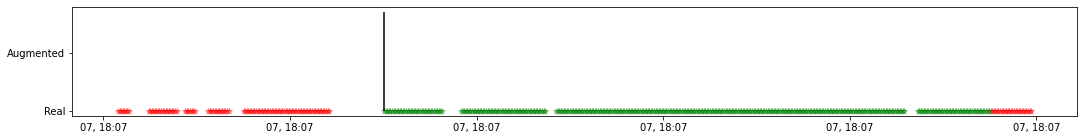

In [53]:
dataset.draw_timeline(0.2)

In [4]:
from ltbio.ml.supervised import SupervisedTrainConditions
conditions = SupervisedTrainConditions(optimizer=optimizer, loss=loss, epochs=200, learning_rate=0.001, validation_ratio=0.2, batch_size=128)

In [5]:
from ltbio.ml.supervised.models import TorchModel
model = TorchModel(neural_network_design)

In [6]:
model.train(dataset, conditions)

NameError: name 'dataset' is not defined